In [ ]:
!pip install flopy

In [1]:
# Temporal, para agregar las rutas correctas
%run ../../src/ft1D/ruta_temporal.py
if not(src_path in sys.path[0]):
    sys.path.insert(0, os.path.abspath(a_path + src_path)) 

In [2]:
import os, sys     # Intefaces con el sistema operativo.
import numpy as np # Manejo de arreglos numéricos multidimensionales
import matplotlib.pyplot as plt # Graficación

# Biblioteca y módulos de flopy
import flopy
from flopy.plot.styles import styles

# Extras para mf6 y flopy (módulo creado en esre proyecto)
import xmf6

In [3]:
mesh = xmf6.MeshDis(
    nrow = 1,    # Number of rows
    ncol = 30,  # Number of columns
    nlay = 1,    # Number of layers
    row_length = 15.0,    # Length of system ($cm$)
    column_length = 0.1,  # Length of system ($cm$)
    top = 1.0,   # Top of the model ($cm$)
    bottom = 0,  # Layer bottom elevation ($cm$)
)

xmf6.nice_print(mesh.get_dict(), 'Space discretization')


Space discretization
------------------------------
          row_length = 15.0      
          col_length = 0.1       
          lay_length = 1.0       
                ncol = 30        
                nrow = 1         
                nlay = 1         
                delr = 0.5       
                delc = 0.1       
                dell = 1.0       
                 top = 1.0       
              bottom = 0         


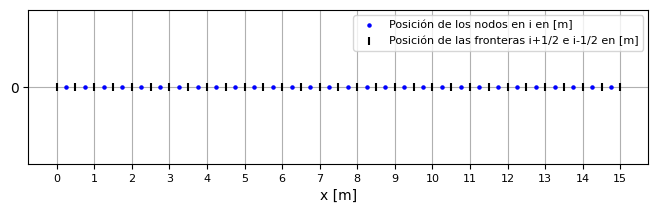

In [4]:
xv = np.linspace(mesh.delr/2, mesh.row_length-mesh.delr/2, mesh.ncol)        #
xn = np.linspace(0, mesh.row_length, mesh.ncol+1)                      
plt.figure(figsize=(8,2))
plt.scatter(xv, np.zeros(len(xv)), marker = '.', s=20, c='blue', 
            zorder=5, label = "Posición de los nodos en i en [m]")
plt.scatter(xn, np.zeros(len(xn)), marker = '|', c='k', 
            zorder=5, label = "Posición de las fronteras i+1/2 e i-1/2 en [m]")
plt.xlabel('x [m]')
plt.xticks(ticks = np.arange(0,16,1), fontsize=8)
plt.yticks(ticks=[0])
plt.grid()
plt.legend(fontsize=8)
plt.show()

In [5]:
q_inf = 10
r = -0.02
qn = np.zeros(mesh.ncol+1)                       #Vector de q en las fronteras de las celdas en [m/dias]
qv = np.zeros(mesh.ncol)                             #Vector de q en los nodos o centros "i" en [m/dias]
for i in range(0, mesh.ncol+1):
    if i == 0:
        qn[i] = q_inf                        #Valor de q en 0-1/2 de la primera frontera (que sería la condición de frontera izquierda de qinf)
    else:
        qn[i] = qn[i-1]+(r*mesh.delr)    #Valor de q en las demás fronteras en i-1/2, i+1/2 
        qv[i-1] = (qn[i-1]+qn[i])/2   #Valor de q en los nodos i

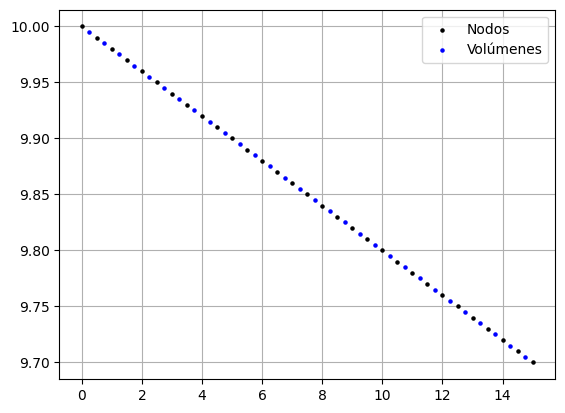

In [6]:
plt.scatter(xn, qn, marker = '.', s=20, c='k', zorder=5, label ='Nodos')
plt.scatter(xv, qv, marker = '.', s=20, c='blue', zorder=5, label = 'Volúmenes')
plt.grid()
plt.legend()

In [7]:
long_ini_cini = 1.0
long_fin_cini = 7.5 

i_cini = int(long_ini_cini / mesh.delr)
f_cini = int(long_fin_cini / mesh.delr)

print(i_cini, f_cini)

2 15


In [8]:
head = np.zeros(mesh.ncol)
head [i_cini: f_cini] = 1.0

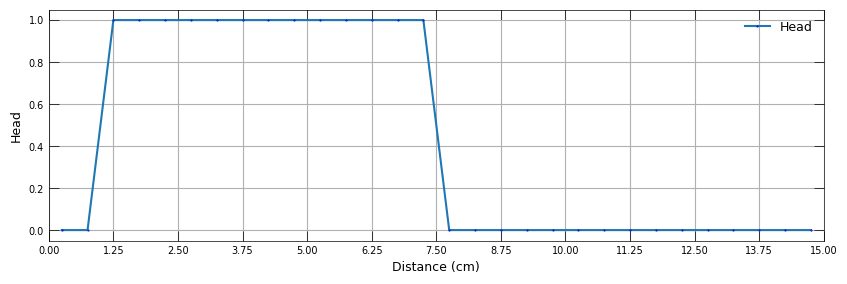

In [9]:
with styles.USGSPlot():
    plt.rcParams['font.family'] = 'DeJavu Sans'
    x, _, _ = mesh.get_coords()
    plt.figure(figsize=(10,3))
    plt.plot(x, head, marker=".", ls ="-", mec="blue", mfc="none", markersize="1", label = 'Head')
    plt.xlim(0, 12)
    plt.xticks(ticks=np.linspace(0, mesh.row_length,13))
    plt.xlabel("Distance (cm)")
    plt.ylabel("Head")
    plt.legend()
    plt.grid()
    plt.show()

In [10]:
tm_par = dict(
    nper = 1,           # Number of periods
    total_time = 50.8,  # Simulation time ($s$)
    nstp = 508,         # Number of time steps
    tsmult = 1.0        # Multiplier for the length of successive time steps.
)
xmf6.nice_print(tm_par, 'Time discretization')


Time discretization
------------------------------
                nper = 1         
          total_time = 50.8      
                nstp = 508       
              tsmult = 1.0       
